In [1]:
import tensorflow as tf
import numpy as np
from  tensorflow.keras import layers as ly 


In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,10))
for i in range(10):
    ax=fig.add_subplot(5,2,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [4]:
x_train=x_train/255.0
x_test=x_test/255.0
#print(y_train)

num_classes=len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)



In [5]:
model=tf.keras.Sequential()
layer1=ly.Convolution2D(filters=16,kernel_size=2,strides=1,padding='same',input_shape=(32,32,3),activation='relu')
model.add(layer1)
model.add(ly.MaxPooling2D(pool_size=2))
model.add(ly.Convolution2D(filters=32,kernel_size=2,strides=1,padding='same',activation='relu'))
model.add(ly.MaxPooling2D(pool_size=2))
model.add(ly.Convolution2D(filters=64,kernel_size=2,strides=1,padding='same',activation='relu'))
model.add(ly.MaxPooling2D(pool_size=2))
model.add(ly.Flatten())
model.add(ly.Dense(500,activation='relu'))
model.add(ly.Dense(10,activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flat

In [6]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1,save_best_only=True)
model.load_weights('model.weights.best.hdf5')
hist=model.fit(x_train,y_train,validation_split=0.2,epochs=5,shuffle=True,verbose=1,callbacks=[checkpointer])

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
39968/40000 [============================>.] - ETA: 0s - loss: 0.5155 - acc: 0.8231
Epoch 00001: val_loss improved from inf to 1.00895, saving model to model.weights.best.hdf5
40000/40000 [==============================] - 116s 3ms/sample - loss: 0.5156 - acc: 0.8230 - val_loss: 1.0089 - val_acc: 0.6901
Epoch 2/5
39968/40000 [============================>.] - ETA: 0s - loss: 0.4691 - acc: 0.8409
Epoch 00002: val_loss improved from 1.00895 to 1.00561, saving model to model.weights.best.hdf5
40000/40000 [==============================] - 116s 3ms/sample - loss: 0.4692 - acc: 0.8409 - val_loss: 1.0056 - val_acc: 0.7170
Epoch 3/5
39968/40000 [============================>.] - ETA: 0s - loss: 0.4277 - acc: 0.8547
Epoch 00003: val_loss did not improve from 1.00561
40000/40000 [==============================] - 119s 3ms/sample - loss: 0.4277 - acc: 0.8547 - val_loss: 1.0298 - val_acc: 0.7080
Epoch 4/5
39968/40000 [===================

In [7]:
model.load_weights('model.weights.best.hdf5')


In [8]:
score=model.evaluate(x_test,y_test,verbose=0)
print(score)

[1.0392813310623168, 0.7083]


In [9]:
predicts=model.predict(x_test)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
predicts.shape

(10000, 10)

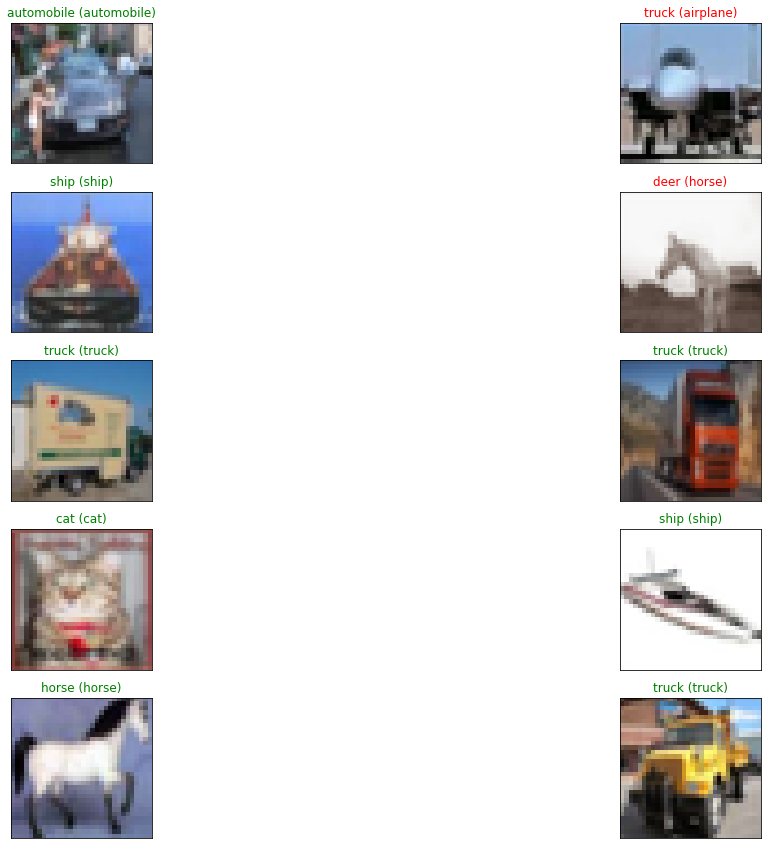

In [11]:
fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=10, replace=False)):
    ax = fig.add_subplot(5, 2, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(predicts[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [12]:
from tensorflow.keras import backend as K
#VISUALIZATION OF FIRST FILTER

get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[0].output])
layer_output = get_3rd_layer_output([x_test])[0]

In [13]:
layer_output[i].shape

(32, 32, 16)

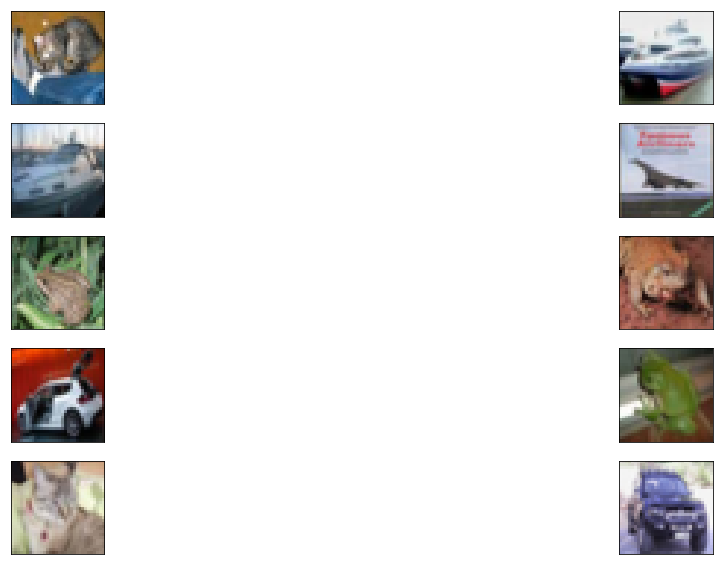

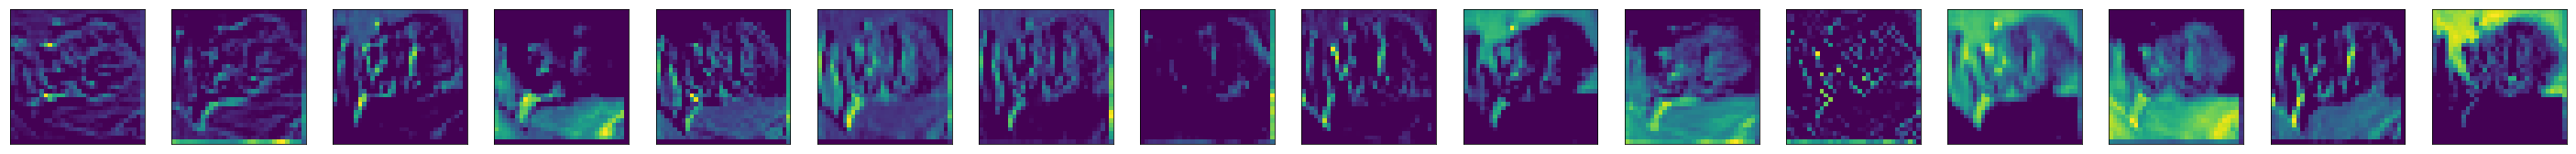

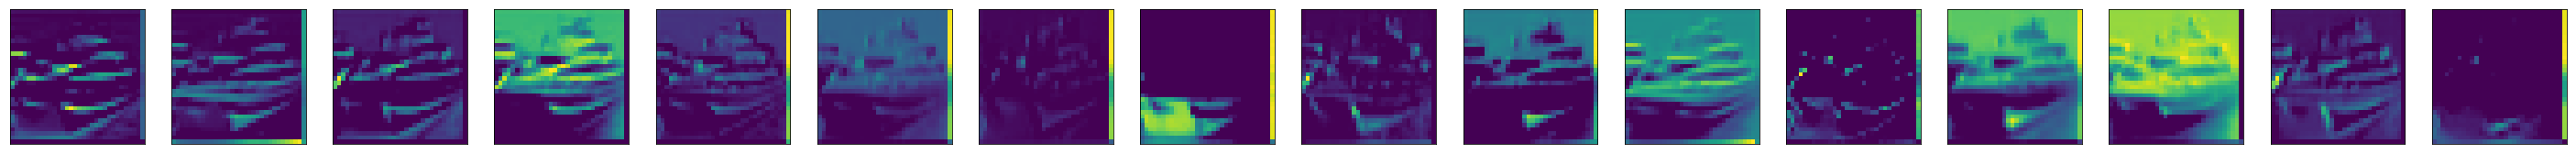

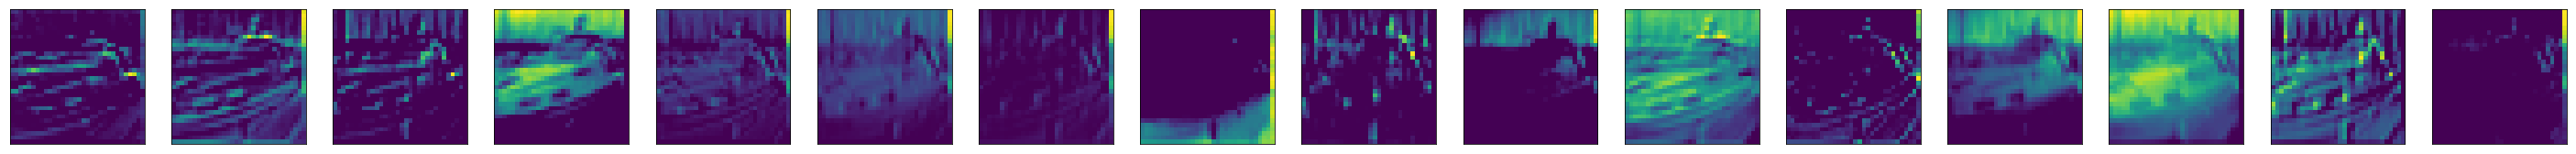

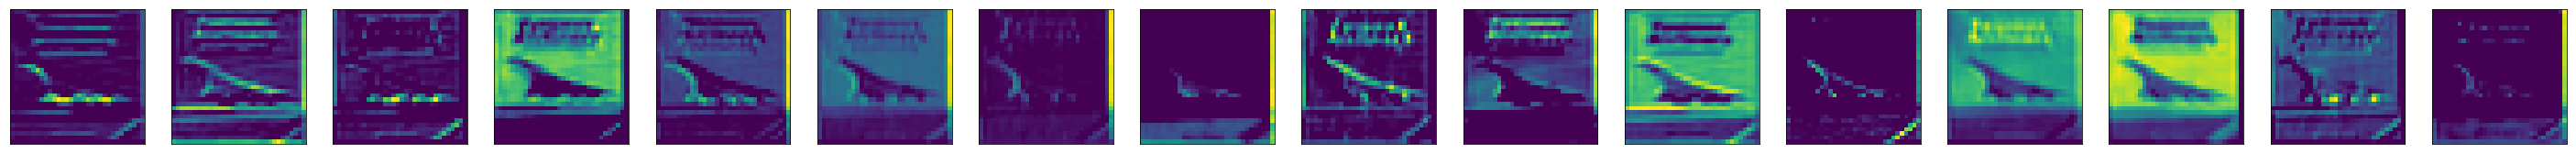

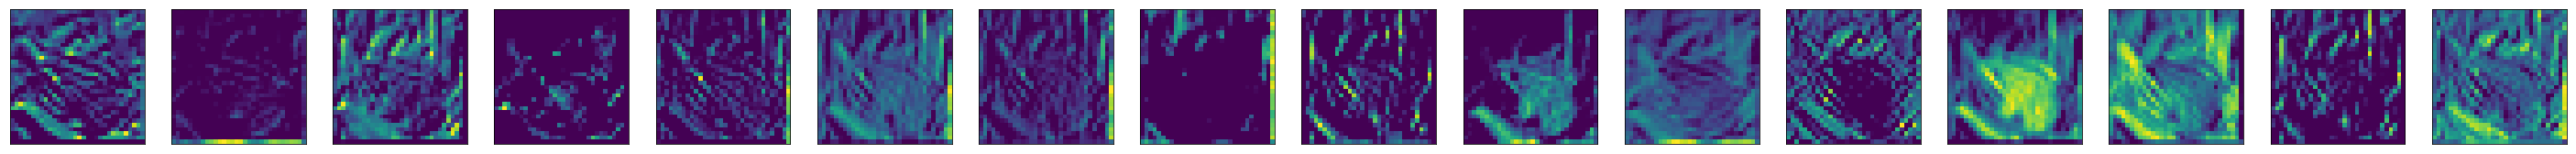

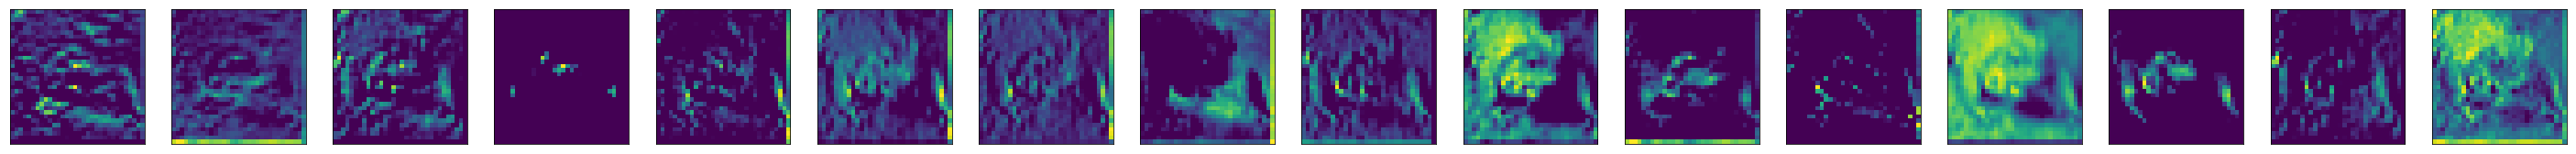

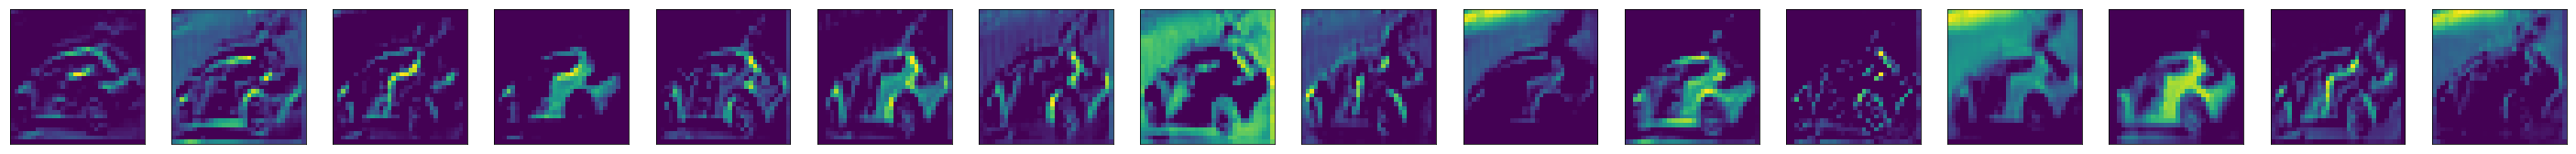

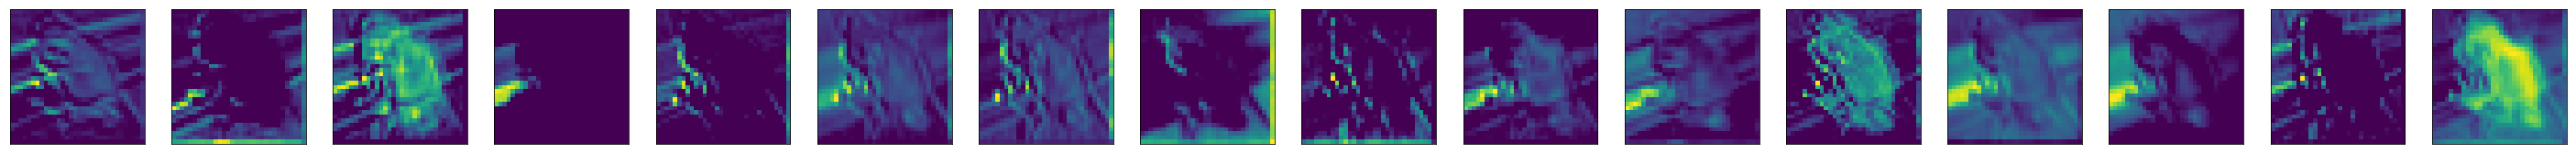

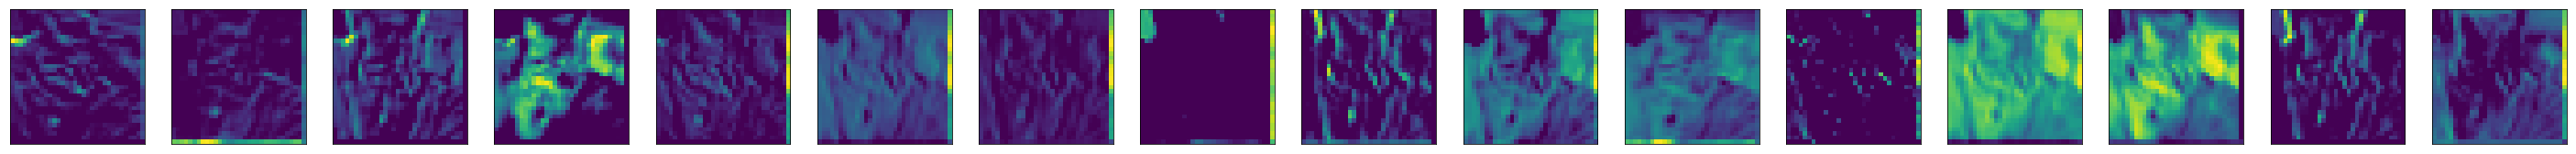

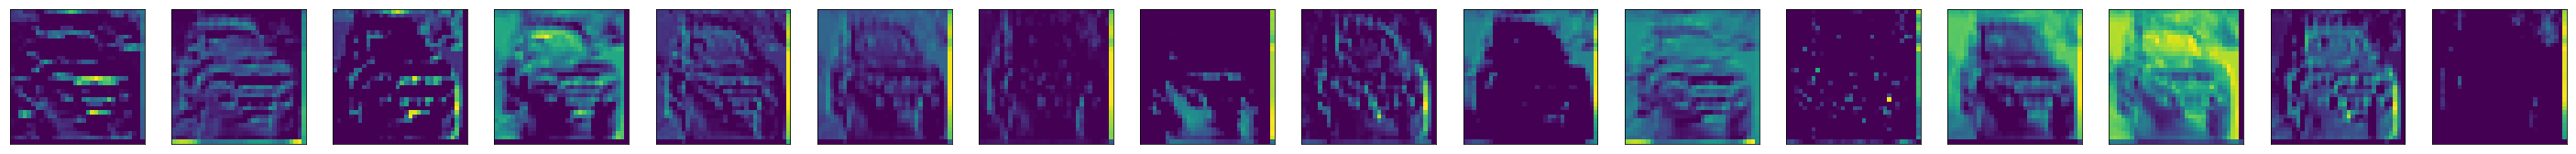

In [15]:
fig=plt.figure(figsize=(20,10))
for i in range(10):
    ax=fig.add_subplot(5,2,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_test[i]))






for i in range(10):  
    fig=plt.figure(figsize=(50,50))
    for j in range(16):
        ax=fig.add_subplot(1,16,j+1,xticks=[],yticks=[])
        ax.imshow(np.squeeze(layer_output[i,:,:,j]))